# STA130 HW3

### 1. Flipper length of penguins visualized using histograms

In [64]:
import pandas as pd 
penguins_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


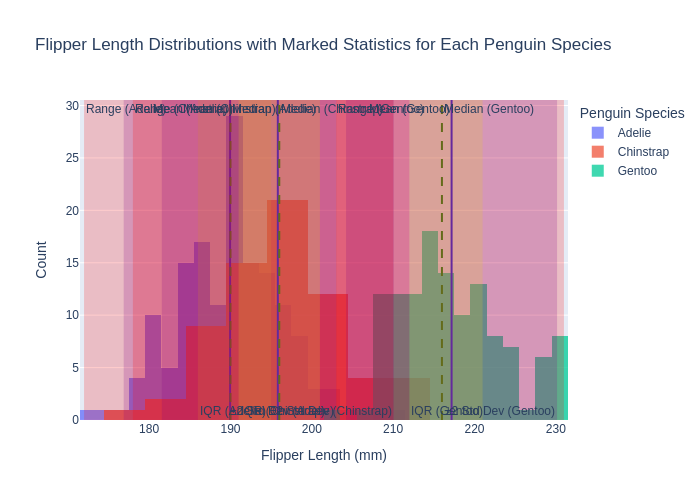

In [65]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Remove rows with NaN values in 'flipper_length_mm' and 'species' columns
penguins_clean = penguins_df.dropna(subset=['flipper_length_mm', 'species'])

# Calculate statistical metrics for each species
species_stats = penguins_clean.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min_value='min',
    max_value='max',
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75)
).reset_index()


# Plot histograms for each species and add lines and rectangles for the statistics
fig = go.Figure()

for _, row in species_stats.iterrows():
    species = row['species']
    species_data = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']
    
    # Add histogram
    fig.add_trace(go.Histogram(
        x=species_data,
        name=species,
        opacity=0.75
    ))
    
    # Mean and median
    fig.add_vline(x=row['mean'], line=dict(color='blue', width=2), annotation_text=f'Mean ({species})', annotation_position="top left")
    fig.add_vline(x=row['median'], line=dict(color='green', width=2, dash='dash'), annotation_text=f'Median ({species})', annotation_position="top right")
    
    # Range
    fig.add_vrect(x0=row['min_value'], x1=row['max_value'], line_width=0, fillcolor="red", opacity=0.2, annotation_text=f"Range ({species})", annotation_position="top left")
    
    # IQR
    fig.add_vrect(x0=row['Q1'], x1=row['Q3'], line_width=0, fillcolor="yellow", opacity=0.2, annotation_text=f"IQR ({species})", annotation_position="bottom left")
    
    # Two standard deviations away from the mean
    lower_bound = row['mean'] - 2 * row['std']
    upper_bound = row['mean'] + 2 * row['std']
    fig.add_vrect(x0=lower_bound, x1=upper_bound, line_width=0, fillcolor="purple", opacity=0.2, annotation_text=f"±2 Std Dev ({species})", annotation_position="bottom right")

# Customize the layout
fig.update_layout(
    title="Flipper Length Distributions with Marked Statistics for Each Penguin Species",
    barmode='overlay',
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    legend_title="Penguin Species"
)

# Show the plot
fig.show(renderer="png")


### 2. Visualizing data using seaborn kernal density estimation (KDE) plots

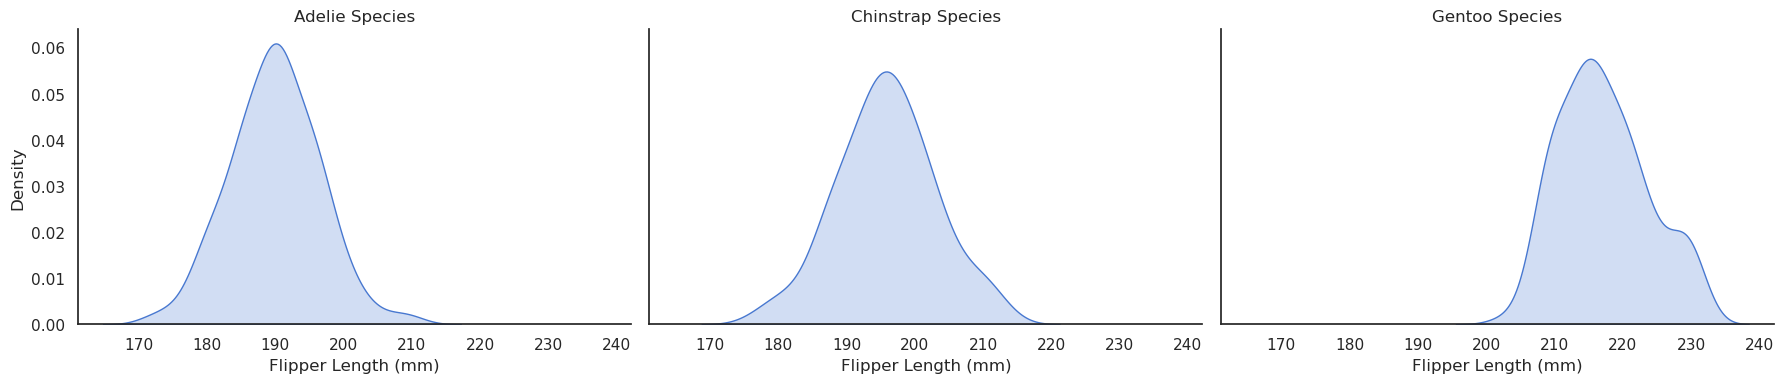

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and theme
sns.set_style("whitegrid")  # Background style with grid
sns.set_theme(style="white", palette="muted")  # Theme with a muted color palette

# Custom palette for KDE plots
palette = sns.color_palette("husl", 3)  # Generates a palette with 3 distinct colors

# Create a FacetGrid to organize KDE plots for each species in rows of 3
g = sns.FacetGrid(penguins_clean, col="species", col_wrap=3, height=4, aspect=1.5, palette=palette)

# Map the KDE plot for flipper_length_mm to each facet
g.map(sns.kdeplot, "flipper_length_mm", fill=True)

# Add titles and adjust layout
g.set_titles(col_template="{col_name} Species")
g.set_axis_labels("Flipper Length (mm)", "Density")

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()


Prompting ChatGPT to help me style our KDE plots

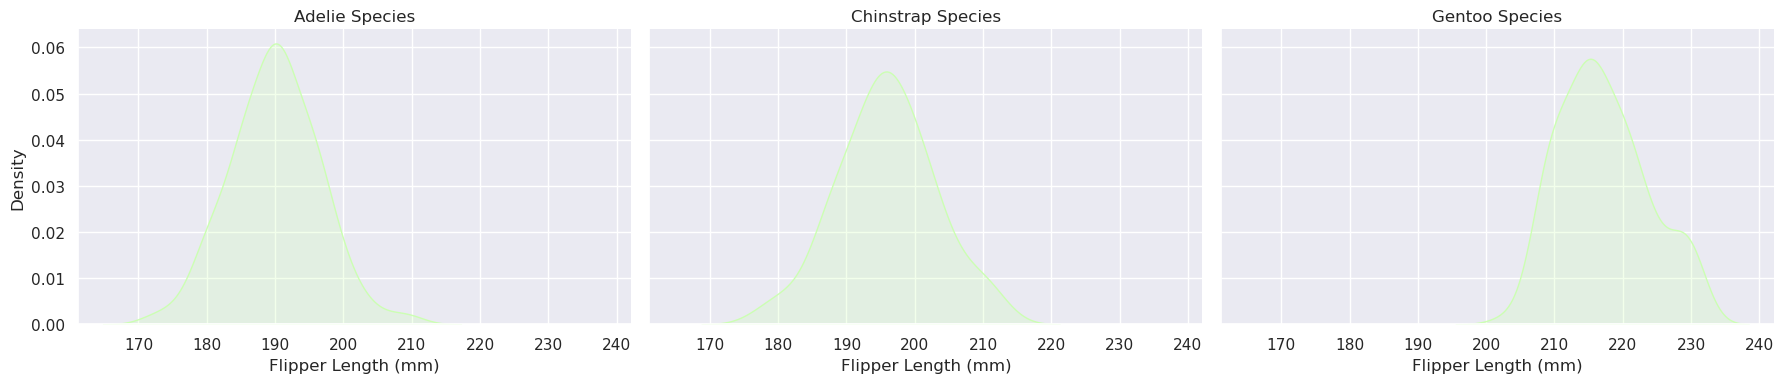

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and theme
sns.set_style("darkgrid")  # Use 'darkgrid' background style

# Set a custom color palette (list of hex codes or named colors)
sns.set_theme(style="darkgrid", palette=["#ccffb3", "#ff6666", "#6699ff"])

# Custom palette for KDE plots, using a predefined palette or custom
palette = sns.color_palette("husl", 3)  # Generates a palette with 3 distinct colors

# Create a FacetGrid to organize KDE plots for each species in rows of 3
g = sns.FacetGrid(penguins_clean, col="species", col_wrap=3, height=4, aspect=1.5)

# Map the KDE plot for flipper_length_mm to each facet, using the palette
g.map(sns.kdeplot, "flipper_length_mm", fill=True)

# Add titles and adjust layout
g.set_titles(col_template="{col_name} Species")
g.set_axis_labels("Flipper Length (mm)", "Density")

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()


### 3. Pros and Cons of Box Plots, Histograms and KDE's

I prompted ChatGPT with the following assesment:

- Histogram groups data into ranges and plots the frequency that data occurs in each range, better for **visualizing data distribution**.
- Histograms help show overall shape/distribution better than a box plot (finer resolution, smaller bins = more detail)

- Box plots are used to compare multiple groups of data, showing **median, interquartile range, max and min values** of data.
- Box plots help show skewness, as median line will be clearly displayed if data is skewed.
- Box plots don't provide info about frequency or distribution shape of data values unlike histograms.
- Box plots don't show sample size, obscured info
- KDE's are smooth continous functions, as opposted to histograms which are stepped, discrete functions.
- KDE's are used to estimate PDF's (probability density functions) of a continous random variable.
- Bandwidth (bins) in KDE determines sensitivity of data (smoothness)

ChatGPT responded with my assesment being largely accurate, with a few nuances worth clarifying (can be seen in ChatGPT link below), and a brief summary:

- Histograms excel at showing detailed distribution shapes, especially with appropriate binning, and are often better for visualizing frequency.
- Box plots are more concise and effective for comparison across groups, summarizing data using key statistics like median and IQR.
- KDEs are smooth and can provide a clearer overall shape, but require careful bandwidth selection and are not always "more accurate" than histograms.

When asked for three "data distribution" visualization methods, ChatGPT responded with the three we are discussing in this homework assignment, so I asked for another 3 and recieved:
- Violin plots
- Cumulative Distribution Function (CDF) Plots
- Ridge Plots (Joy Plot)

I prefer KDE's as they're easier to overlap in comparison to histograms, and I enjoy their smoothness visually in comparison to histograms.

### 4. Sample Mean, Variance & Standard Deviations

- Mean: Average measure of dataset values (sum of values / number of values)
- Variance: dispersion of a dataset (difference between values and mean)
- Standard Deviation: measure of spread of data set (variance squared)

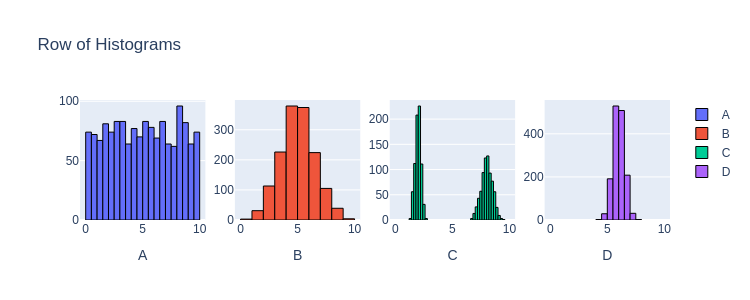

In [68]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

1. Which datasets have similar means and similar variances?


A and C


2. Which datasets have similar means but quite different variances


B and C, B and A


3. Which datasets have similar variances but quite different means


B and D

4. Which datasets have quite different means and quite different variances



C and D

In [69]:
print(f"Mean of A: {np.mean(data1)}")
print(f"Mean of B: {np.mean(data2)}")
print(f"Mean of C: {np.mean(data3)}")
print(f"Mean of D: {np.mean(data4)}")

Mean of A: 5.0047448599201605
Mean of B: 5.017773044408072
Mean of C: 5.003519166211165
Mean of D: 5.99690134312391


In [70]:
print(f"Variance of A: {np.var(data1)}") 
print(f"Variance of B: {np.var(data2)}") 
print(f"Variance of C: {np.var(data3)}") 
print(f"Variance of D: {np.var(data4)}") 

Variance of A: 8.266841274560136
Variance of B: 2.2969758287448823
Variance of C: 9.258438958804351
Variance of D: 0.2407227907448615


In [71]:
print(f"Std deviation of A: {np.std(data1)}") 
print(f"Std deviation of B: {np.std(data2)}") 
print(f"Std deviation of C: {np.std(data3)}") 
print(f"Std deviation of D: {np.std(data4)}") 

Std deviation of A: 2.8752115182295954
Std deviation of B: 1.5155777211165655
Std deviation of C: 3.0427683051465406
Std deviation of D: 0.49063508919038956


##### Parameters & Statistics

- Parameters
    - numerical values that describe a characteristic of a **population**
    - scope: population (entire group of interest)
    - ex. *mean* height of all adults in a country or stadnard deviation of exam scores for all students in a province. 
    - denoted w/ Greek letters
        - 𝜇 for pop. mean
        - σ for pop. std dev
    
    
    
- Statistics
    - numerical values describing characteristic of a **sample** drawn from population
    - scope: sample (subset of population)
    - ex. *mean* height of a group of 100 randomly selected adults or standard deviation of exam scores for a sample of 50 students
    - denoted using Latin letters
        - 𝑥ˉ for sample mean
        - s for sample std dev

###### Summary up to pre-lecture questions

https://chatgpt.com/share/66f2e313-2e20-800f-90f0-4130a3cdeeae

We discussed the differences between parameters and statistics. Parameters refer to numerical characteristics of a population, such as the population mean 
𝜇
μ, while statistics refer to numerical characteristics of a sample, such as the sample mean 
𝑥
ˉ
x
ˉ
 . Parameters are typically unknown because it's difficult to measure an entire population, so we use statistics from samples to estimate these parameters.

We also explored how to visualize data distributions using histograms and how to use np.mean(df.col) to calculate means in Python. Finally, we examined a dataset involving different distributions and analyzed their means and variances to compare the relationships between the datasets.

This conversation provided insights into how statistics are calculated and interpreted, particularly in the context of visualizing data and comparing distributions.

### 5. Relationship between *mean* / *median* and *right / left* skewness

The code generates and analyzes 2 sets of random samples using **Gamma distribution**, which is a type of skewed probability distribution. Skewness can help visualize asymmetry of data, with a **right-skewed distribution (positive skew) having a larger mean than median**. This is due to high value outliers which affect the mean much more than the median. On the other hand, **left-skewed distribution (negative skew) has a larger median than mean**, due to lower value outliers dragging the mean down.

The first three lines of the code below import the required libraries:
- scipy.stats: provides statistical functions & distributions, such as generating random variables from the Gamma distribution
- pandas: used for data manipulation & analysis, such as converting sample into a DataFrame
- numpy: provides numerical operations, such as calculating quantiles

The next three lines of code generate 1000 random values with a right-skewed (positive skew) distribution and plots it on a histogram which is rendered as a png. 

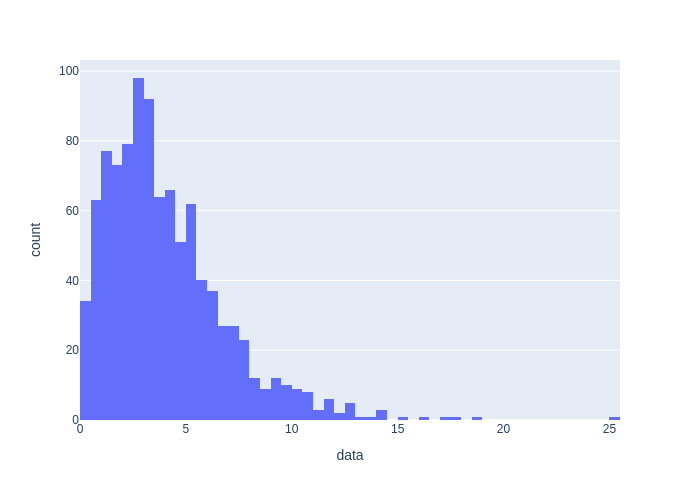

In [72]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

The code below calculates mean and median. Median is taken by computing a quantile of 0.5, which represents the 50th percentile of our data.

In [73]:
print(f"Mean: {sample1.mean()}")
print(f"Median: {np.quantile(sample1, 0.5)}")

Mean: 4.061389961030098
Median: 3.411079497353294


This code is the exact same as the one above, however these randomly generated values now have a left-skewed (negative) distribution due to them being the negative vesion of the same data.

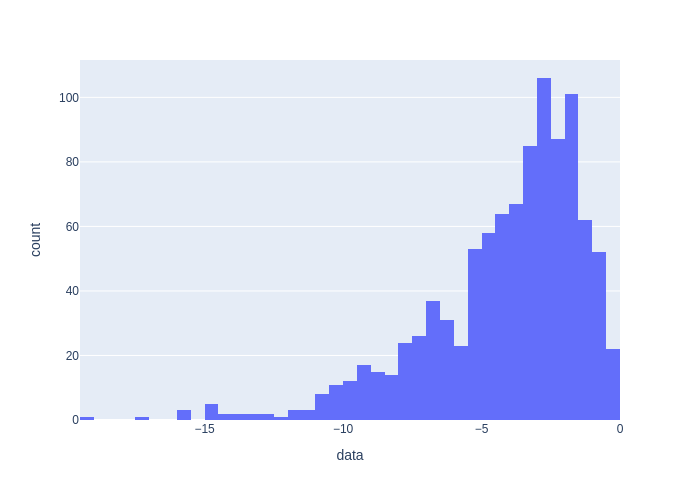

In [74]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

In [75]:
print(f"Mean: {sample2.mean()}")
print(f"Median: {np.quantile(sample2, 0.5)}")

Mean: -4.144115425971472
Median: -3.385591381076611


For both sets of data, we can see that the magnitude of the mean exceeds that of the median. Thus, we have positive and negative skewed histograms. If the mean and median were closer together, the histograms would represent a distribution which would be less skewed, and more symmetric (normal distribution).

##### Summary of Mean/Median and Skewness conversation with ChatGPT

https://chatgpt.com/share/66f4d344-3484-800f-b667-47e6b4bf8530

We discussed the relationship between mean, median, and the skewness of a data distribution. In right-skewed distributions, the mean is greater than the median, while in left-skewed distributions, the mean is less than the median. This happens because the mean is influenced by extreme values (outliers), which pull it in the direction of the skew, while the median remains more central.

We also reviewed a Python code snippet using scipy, numpy, and pandas to generate random samples from a Gamma distribution. The code creates two sets of data: one right-skewed and one left-skewed (by negating the values). It visualizes the right-skewed data in a histogram, then calculates the mean and median of the first sample to observe the effect of skewness on these measures of central tendency.

This demonstrates how skewed distributions affect the relationship between the mean and median.

### 6. Visualizing and Summarizing External Data

In [76]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-05-07/rolling_stone.csv')

df #I chose a dataset comparing Rolling Stone’s “500 Greatest Albums of All Time” lists from 2003, 2012, and 2020

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.000000,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.000000,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.000000,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,...,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.000000,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,...,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.000000,0.0,18tV6PLXYvVjsdOVk0S7M8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Beck,Beck,Sea Change,440.0,436.0,NaN,-61,2002,Indie/Alternative Rock,Studio,...,8,51.0,spotify:album:5ieP11rJQvuYz0Ov3k03cy,1.0,Male,1970.0,1993.0,32.000000,9.0,5ieP11rJQvuYz0Ov3k03cy
687,"Cooke, Sam",Sam Cooke,Portrait of a Legend 1951-1964,106.0,107.0,307.0,-201,2003,Soul/Gospel/R&B,Greatest Hits,...,135,55.0,spotify:album:4jiO2jRz7g50ESvYYKsKwZ,1.0,Male,1931.0,1958.0,72.000000,45.0,4jiO2jRz7g50ESvYYKsKwZ
688,White Stripes,The White Stripes,Elephant,390.0,390.0,449.0,-59,2003,Blues/Blues Rock,Studio,...,6,76.0,spotify:album:6D9urpsOWWKtYvF6PaorGE,2.0,Male/Female,3949.0,1999.0,28.500000,4.0,6D9urpsOWWKtYvF6PaorGE
689,"Chao, Manu",Manu Chao,Proxima estacion: Esperanza,NaN,474.0,NaN,-501,2001,Latin,Studio,...,201,73.0,spotify:album:4t1LLdXiWTfoywqricztFo,1.0,Male,1961.0,1998.0,40.000000,3.0,4t1LLdXiWTfoywqricztFo


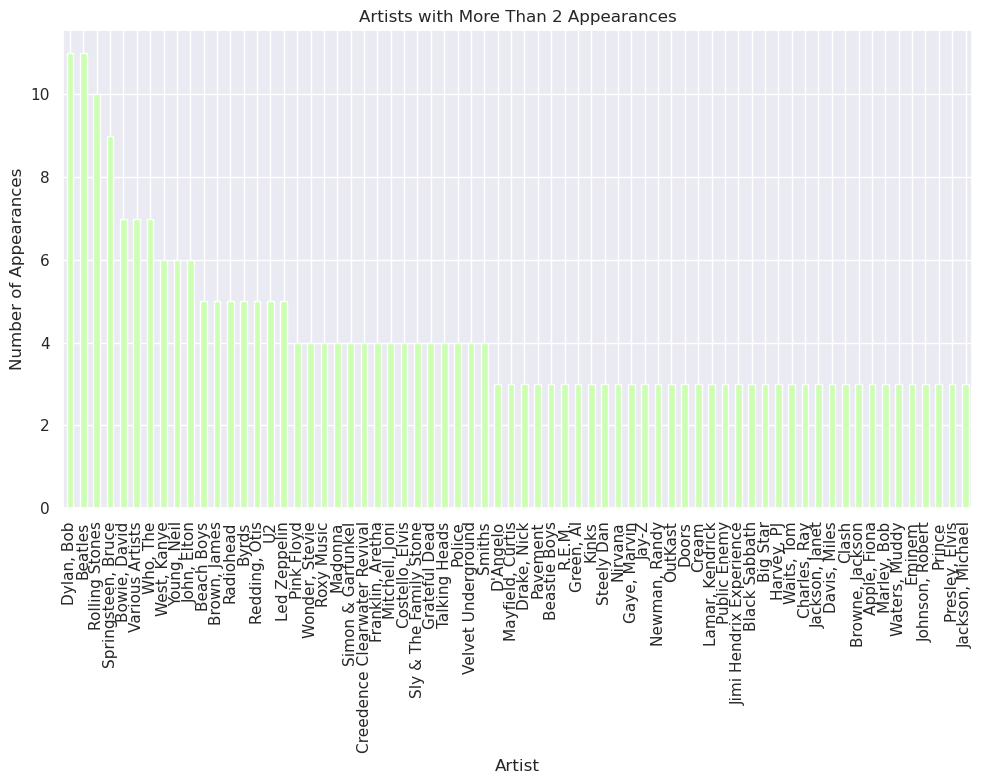

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-05-07/rolling_stone.csv'
df = pd.read_csv(url)

# Group by 'sort_name' to count appearances
artist_counts = df['sort_name'].value_counts()

# Filter for artists with more than 2 appearances
filtered_artist_counts = artist_counts[artist_counts > 2]

# Create a histogram of the filtered artists sorted by most appearances
plt.figure(figsize=(10, 8))
filtered_artist_counts.plot(kind='bar')
plt.title('Artists with More Than 2 Appearances')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histogram showing artists with most appearances on the list

I initially did not filter for artists with more than 2 appearences, however that resulted in an x-axis that was illegible due to too much clutter. I wanted to analyze this data set to see which artists had most appearences on this list. The histogram below filters for artists falling under the hip-hop genre.

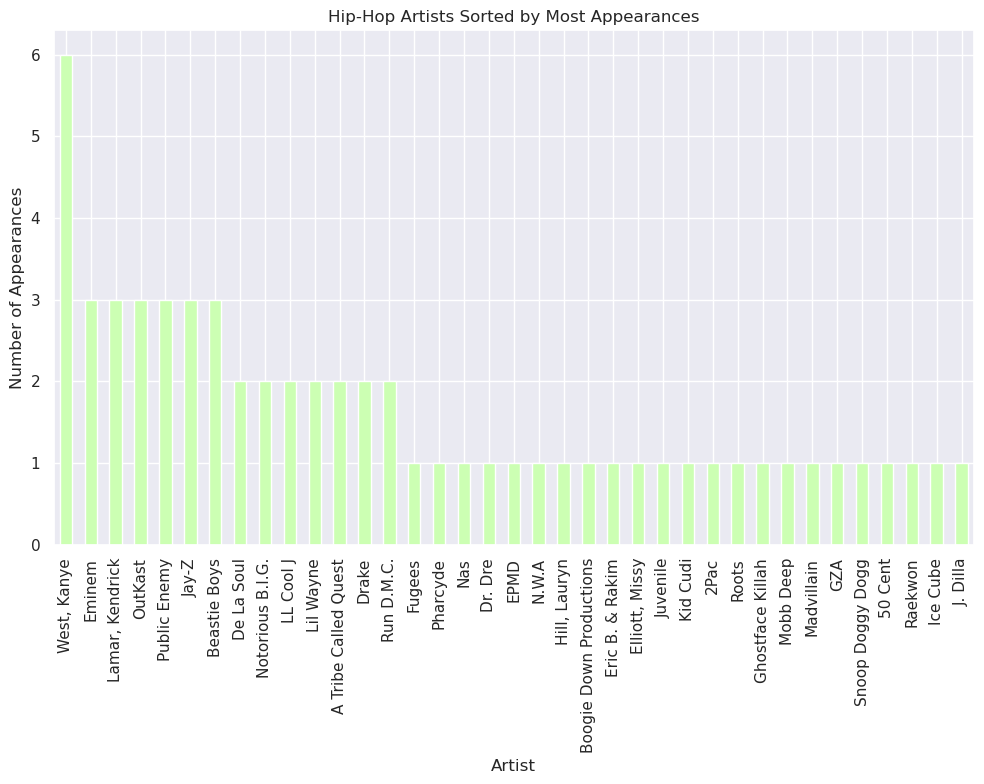

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-05-07/rolling_stone.csv'
df = pd.read_csv(url)

# Filter the dataframe for hip-hop genre
hiphop_df = df[df['genre'].str.contains('hip-hop', case=False, na=False)]

# Group by 'sort_name' to count appearances
hiphop_artist_counts = hiphop_df['sort_name'].value_counts()

# Create a histogram of the hip-hop artists sorted by most appearances
plt.figure(figsize=(10, 8))
hiphop_artist_counts.plot(kind='bar')
plt.title('Hip-Hop Artists Sorted by Most Appearances')
plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Same as above except just displaying artists falling under the hip-hop genre


Below shows album release years as a box plot filtered by gender. Female artists appear in the lists much more frequently during the 1990's and onwards.

<Figure size 1000x800 with 0 Axes>

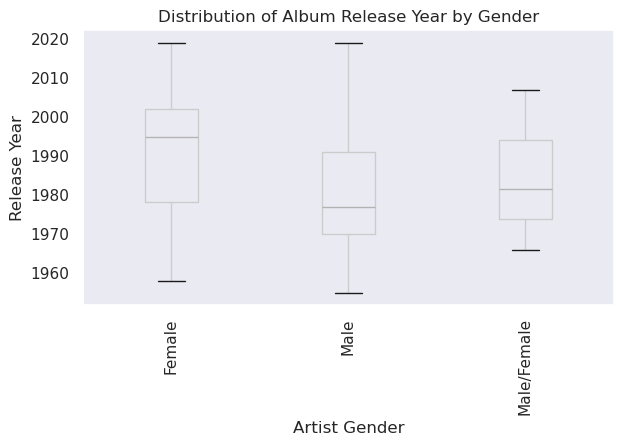

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-05-07/rolling_stone.csv'
df = pd.read_csv(url)

# Filter out rows with missing gender or release year information
filtered_df = df[['artist_gender', 'release_year']].dropna()

# Create a box plot of release years grouped by artist gender
plt.figure(figsize=(10, 8))
filtered_df.boxplot(column='release_year', by='artist_gender', grid=False)

# Set plot labels and titles
plt.title('Distribution of Album Release Year by Gender')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.xlabel('Artist Gender')
plt.ylabel('Release Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##### Summary of Visualizing data with ChatGPT

https://chatgpt.com/share/66f4d43f-9fe4-800f-b06c-528851948e67

In this session, I worked on analyzing the Rolling Stone dataset, which contains information about albums, artists, and their rankings across different years. The goal was to generate visual representations of the data using Python (with pandas and matplotlib). Specifically, I:

Loaded the Dataset: The data was loaded from a CSV file hosted online, containing various columns such as sort_name (artist names), album, release_year, genre, and more.

Artists by Appearances: I first created a bar chart showing the number of appearances of each artist. Using the sort_name column, I counted the occurrences of each artist and plotted a histogram that sorted the artists by their frequency in the dataset.

Filtering Artists with More than Two Appearances: Next, I modified the chart to only include artists who appeared more than twice. This filtering gave a clearer view of the more prominent artists in the dataset.

Hip-Hop Artists: I further refined the analysis by filtering for artists whose genre was listed as “hip-hop.” This allowed me to generate a specific histogram showing hip-hop artists sorted by their number of appearances.

Box Plot by Gender and Release Year: Finally, I created a box plot to explore the distribution of album release years, categorized by artist gender. This visualization helped identify trends in album releases over time for different genders.

Each step involved data filtering and visualization to better understand trends in the music industry based on the data available in the Rolling Stone dataset.








### 7. Plotly Animation #1

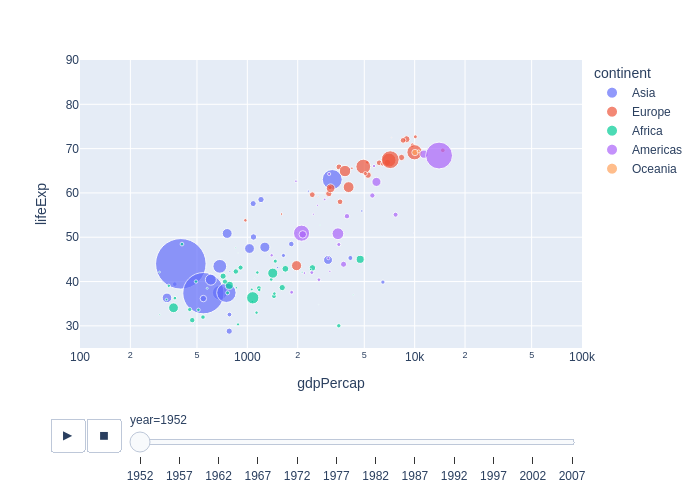

In [83]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png") #added this in as when redered as an animation it does not appear on github

### 8. Plotly Animation #2

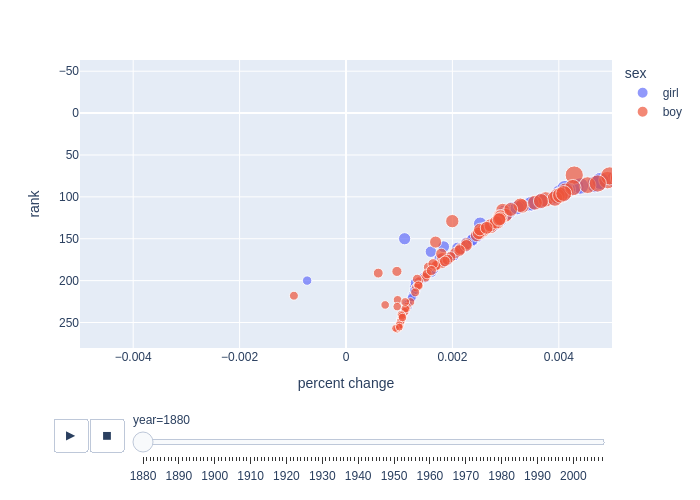

In [82]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 9. Course Review

Yes, I have reviewed the course wiki-textbook. I did not require ChatGPT's assistance for questions 7-9, hence no summary or link provided.